In [18]:
%%writefile topsis.py
import sys
import pandas as pd
import numpy as np
import os

def main():
    if len(sys.argv) != 5:
        print("Error: Incorrect number of parameters")
        sys.exit(1)

    input_file = sys.argv[1]
    weights_input = sys.argv[2]
    impacts_input = sys.argv[3]
    output_file = sys.argv[4]

    if not os.path.isfile(input_file):
        print("Error: File not found")
        sys.exit(1)

    data = pd.read_csv(input_file)

    if data.shape[1] < 3:
        print("Error: Input file must contain at least 3 columns")
        sys.exit(1)

    criteria = data.iloc[:, 1:]

    try:
        criteria = criteria.astype(float)
    except ValueError:
        print("Error: Non-numeric data found")
        sys.exit(1)

    weights = list(map(float, weights_input.split(",")))
    impacts = impacts_input.split(",")

    if len(weights) != criteria.shape[1] or len(impacts) != criteria.shape[1]:
        print("Error: Weights, impacts and columns mismatch")
        sys.exit(1)

    if not all(i in ['+', '-'] for i in impacts):
        print("Error: Impacts must be + or -")
        sys.exit(1)

    norm = criteria / np.sqrt((criteria ** 2).sum())
    weighted = norm * weights

    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == '+':
            ideal_best.append(weighted.iloc[:, i].max())
            ideal_worst.append(weighted.iloc[:, i].min())
        else:
            ideal_best.append(weighted.iloc[:, i].min())
            ideal_worst.append(weighted.iloc[:, i].max())

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

    d_best = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
    d_worst = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

    scores = d_worst / (d_best + d_worst)

    data["Topsis Score"] = scores
    data["Rank"] = data["Topsis Score"].rank(ascending=False, method="dense").astype(int)

    data.to_csv(output_file, index=False)
    print("TOPSIS analysis completed.")

if __name__ == "__main__":
    main()


Overwriting topsis.py


In [19]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (2).xlsx


In [20]:
!python topsis.py data.csv "1,1,1,1,1" "+,+,-,+,+" output.csv

TOPSIS analysis completed.


In [22]:
import pandas as pd
pd.read_csv("output.csv")

,Fund Name,P1,P2,P3,P4,P5,Topsis Score,Rank
0,M1,0.67,0.45,6.5,42.6,12.56,0.215165,8
1,M2,0.60,0.36,3.6,53.3,14.47,0.468008,4
2,M3,0.82,0.67,3.8,63.1,17.10,0.861481,1
3,M4,0.60,0.36,3.5,69.2,18.42,0.588547,3
4,M5,0.76,0.58,4.8,43.0,12.29,0.450754,5
5,M6,0.69,0.48,6.6,48.7,14.12,0.326624,7
6,M7,0.79,0.62,4.8,59.2,16.35,0.695464,2
7,M8,0.84,0.71,6.5,34.5,10.64,0.414151,6


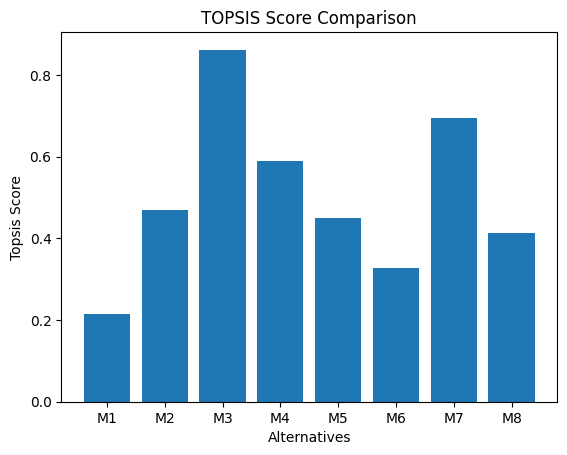

In [23]:
import matplotlib.pyplot as plt

df = pd.read_csv("output.csv")

plt.bar(df["Fund Name"], df["Topsis Score"])
plt.xlabel("Alternatives")
plt.ylabel("Topsis Score")
plt.title("TOPSIS Score Comparison")
plt.show()